In [1]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from IPython.display import clear_output
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
import seaborn as sns
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Download the stopwords.
%%time
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
CPU times: user 12.9 ms, sys: 5.38 ms, total: 18.3 ms
Wall time: 105 ms


True

In [3]:
# Import the IMDB review sentiment dataset.
# Download the dataset on https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews.
%%time
imdb_data=pd.read_csv('./drive/My Drive/ML_Code/IMDB Review Sentiment Classification/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(20)

(50000, 2)
CPU times: user 535 ms, sys: 166 ms, total: 701 ms
Wall time: 780 ms


In [4]:
# Display some statistical information.
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
# Count up the sentiment.
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

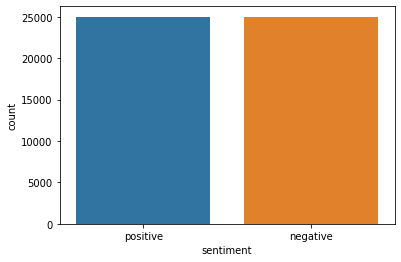

In [6]:
sns.countplot(x='sentiment', data=imdb_data)

In [0]:
# Create the corpus
%%time
corpus = []
for i in range(0, imdb_data['review'].size):
    no_html = BeautifulSoup(imdb_data['review'][i]).get_text()
    clean = re.sub("[^a-z\s]+", " ", no_html, flags=re.IGNORECASE)
    review = re.sub("(\s+)", " ", clean)
    review = re.sub(r'\W', ' ', review)
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

    # print progress.
    clear_output(wait=True)
    print("Progress: %s / %s" % (i, imdb_data['review'].size-1))

Progress: 49920 / 49999


In [0]:
# Convert a collection of text documents to a matrix of token counts.
"""
%%time
vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()
"""

In [9]:
# Convert a collection of raw documents to a matrix of TF-IDF features
%%time
vectorizer = TfidfVectorizer(max_features = 3000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

CPU times: user 8.93 s, sys: 638 ms, total: 9.57 s
Wall time: 9.59 s


In [10]:
# Put the response (sentiment) variable into y.
# Label and transform the sentiment data.
lb = LabelBinarizer()
y = lb.fit_transform(imdb_data['sentiment'])
y.shape

(50000, 1)

In [11]:
# Split the dataset into the training set and test subsets.
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 3000) (10000, 3000) (40000, 1) (10000, 1)
CPU times: user 157 ms, sys: 247 ms, total: 404 ms
Wall time: 407 ms


### **Logistic Regression**

In [12]:
# Train the Logistic Regression classifier.
%%time
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=0)
lr.fit(X_train, y_train)

CPU times: user 17.1 s, sys: 5.52 s, total: 22.6 s
Wall time: 7.87 s


In [13]:
# Evaluate estimator performance.
%%time
score = lr.score(X_test, y_test)
print('Accuracy: %.2f' % (score))

Accuracy: 0.88
CPU times: user 77.1 ms, sys: 119 ms, total: 196 ms
Wall time: 70.1 ms


In [14]:
# Compute cross-validated metrics (10-fold).
%%time
scores = cross_val_score(lr, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.01)
CPU times: user 2min 50s, sys: 34.9 s, total: 3min 24s
Wall time: 1min 4s


In [15]:
# Test model performance
%%time
y_pred = lr.predict(X_test)

CPU times: user 77.2 ms, sys: 55.8 ms, total: 133 ms
Wall time: 36.5 ms


In [16]:
lr_report = classification_report(y_test, y_pred, target_names=['Positive','Negative'])
print(lr_report)

              precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      5035
    Negative       0.87      0.89      0.88      4965

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [17]:
# Print Confusion Matrix.
%%time
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4397  638]
 [ 538 4427]]
CPU times: user 28.3 ms, sys: 45.4 ms, total: 73.7 ms
Wall time: 22.7 ms


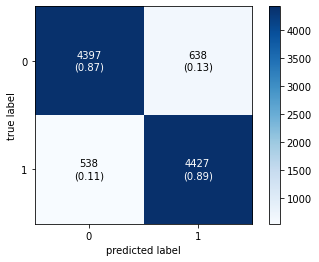

CPU times: user 207 ms, sys: 101 ms, total: 308 ms
Wall time: 195 ms


In [18]:
# Plot the confusion matrix.
%%time
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

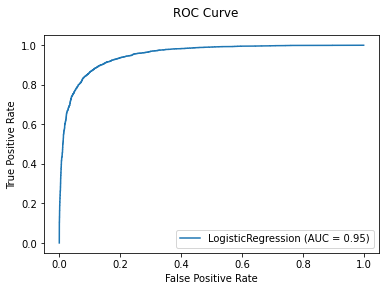

In [19]:
# Plot the ROC curve.
lr_disp = plot_roc_curve(lr, X_test, y_test)
lr_disp.figure_.suptitle("ROC Curve")

plt.show()

### **Linear SVM**

In [20]:
# Train the linear SVM model.
svm = SGDClassifier(loss='hinge', random_state=0)
svm = svm.fit(X_train, y_train)
print(svm)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [21]:
# Evaluate estimator performance.
%%time
score = svm.score(X_test, y_test)
print('Accuracy: %.2f' % (score))

Accuracy: 0.88
CPU times: user 74.6 ms, sys: 0 ns, total: 74.6 ms
Wall time: 37 ms


In [22]:
# Compute cross-validated metrics (10-fold).
%%time
scores = cross_val_score(svm, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.01)
CPU times: user 45.8 s, sys: 2.8 s, total: 48.6 s
Wall time: 45.1 s


### **Multinomial Naive Bayes**

In [23]:
# Train the Multinomial Naive Bayes model.
mnb = MultinomialNB()
mnb = mnb.fit(X_train, y_train)
print(mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [24]:
# Evaluate estimator performance.
%%time
score = mnb.score(X_test, y_test)
print('Accuracy: %.2f' % (score))

Accuracy: 0.85
CPU times: user 147 ms, sys: 75 ms, total: 222 ms
Wall time: 59.7 ms


In [25]:
# Compute cross-validated metrics (10-fold).
%%time
scores = cross_val_score(mnb, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.01)
CPU times: user 11.9 s, sys: 3.39 s, total: 15.3 s
Wall time: 6.5 s


### **Simple Neural Network**

In [26]:
%%time
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
print(mlp)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
CPU times: user 3min 18s, sys: 2min 42s, total: 6min
Wall time: 1min 38s


In [27]:
# Evaluate estimator performance.
%%time
score = mlp.score(X_test, y_test)
print('Accuracy: %.2f' % (score))

Accuracy: 0.86
CPU times: user 505 ms, sys: 190 ms, total: 695 ms
Wall time: 179 ms


In [28]:
# Compute cross-validated metrics (10-fold).
%%time
scores = cross_val_score(mlp, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.01)
CPU times: user 42min 36s, sys: 32min 43s, total: 1h 15min 20s
Wall time: 19min 36s


In [0]:
positive_review = ''
negative_review = ''
#for item in corpus[5]:
for i in range(0, 20000):
  if int(y[i]) == 1: # Positive sentiment
    positive_review += corpus[i]
  else: # Negative sentiment
    negative_review += corpus[i]

In [0]:
# Remove specific words from lists of positive and negative reviews.
new_positive_review = positive_review.replace("movie ", "")
new_positive_review = new_positive_review.replace("one ", "")
new_positive_review = new_positive_review.replace("film ", "")
new_positive_review = new_positive_review.replace("character ", "")
new_positive_review = new_positive_review.replace("time ", "")
new_positive_review = new_positive_review.replace("make ", "")

new_negative_review = negative_review.replace("movie ", "")
new_negative_review = new_negative_review.replace("one ", "")
new_negative_review = new_negative_review.replace("film ", "")
new_negative_review = new_negative_review.replace("character ", "")
new_negative_review = new_negative_review.replace("time ", "")
new_negative_review = new_negative_review.replace("make ", "")

<function matplotlib.pyplot.show>

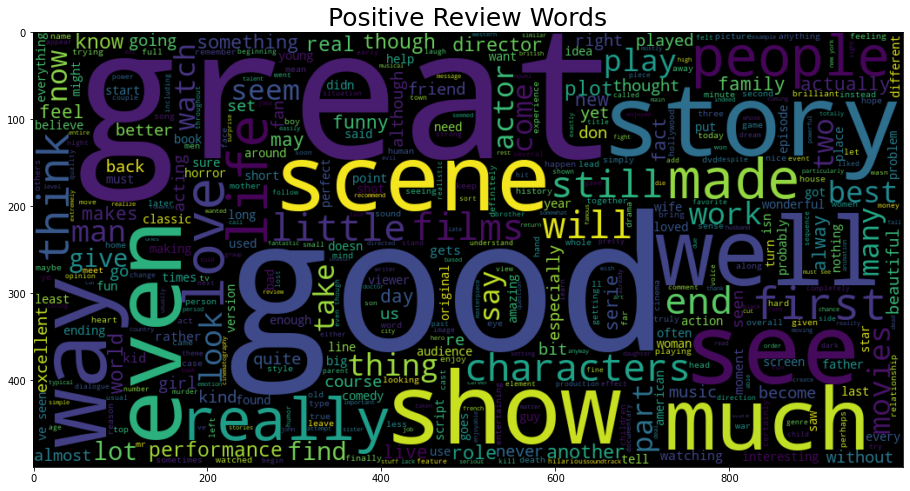

In [31]:
# Word cloud for positive review.
plt.figure(figsize=(16,8))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
positive_words = WC.generate(new_positive_review)
plt.imshow(positive_words, interpolation='bilinear')
plt.title('Positive Review Words', fontsize=25)
plt.show

<function matplotlib.pyplot.show>

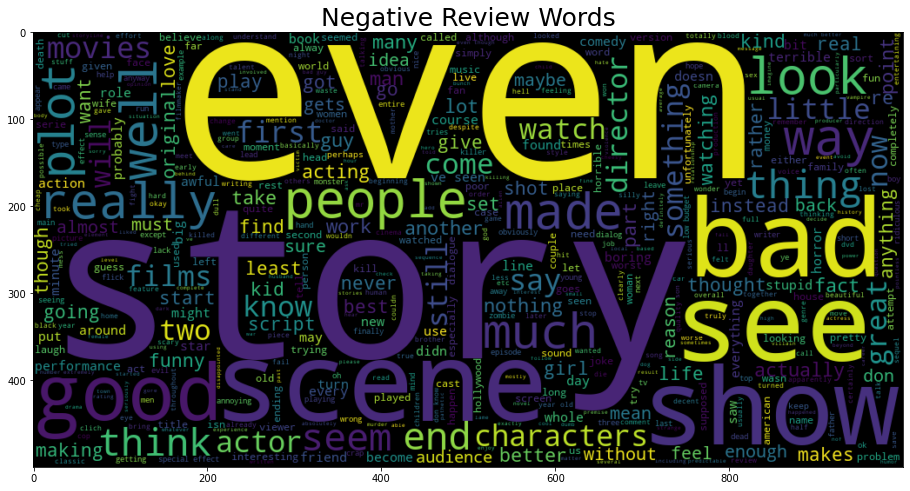

In [32]:
# Word cloud for negative review.
plt.figure(figsize=(16,8))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
negative_words = WC.generate(new_negative_review)
plt.imshow(negative_words, interpolation='bilinear')
plt.title('Negative Review Words', fontsize=25)
plt.show